In [1]:
import pandas as pd
import os

In [3]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
len(movies)

559

In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [60]:
movies.columns = ['Film', 'Genre' ,'CriticRaiting' ,'AudienceRaiting' ,'BudgetMillions' ,'Year']

In [61]:
movies.head()

,Film,Genre,CriticRaiting,AudienceRaiting,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [62]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null category
CriticRaiting      559 non-null int64
AudienceRaiting    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(2), int64(3), object(1)
memory usage: 19.2+ KB


In [63]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRaiting,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRaiting,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [64]:
movies.Year = movies.Year.astype ('category') #transform variables into categorical 
movies.Genre = movies.Genre.astype ('category')

In [65]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRaiting,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRaiting,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


---

In [66]:
#Joint plots

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

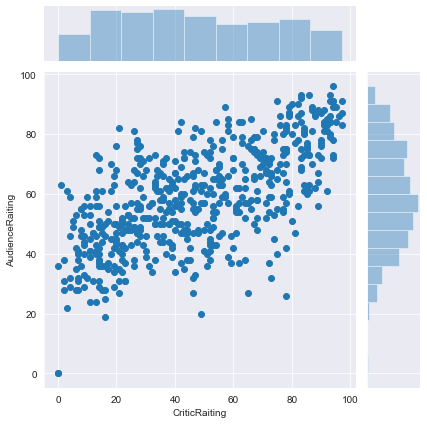

In [68]:
j = sns.jointplot(data=movies, x='CriticRaiting', y='AudienceRaiting')

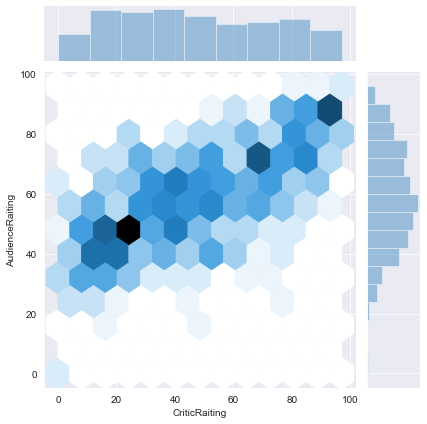

In [69]:
j2 = sns.jointplot(data=movies, x='CriticRaiting', y='AudienceRaiting', kind='hex')

---

In [17]:
#histogramas

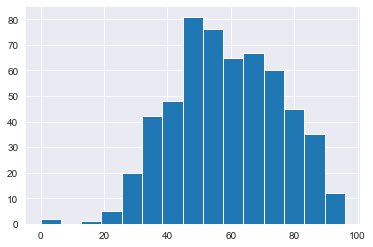

In [70]:
sns.set_style('darkgrid')
n1= plt.hist(movies.AudienceRaiting, bins=15)

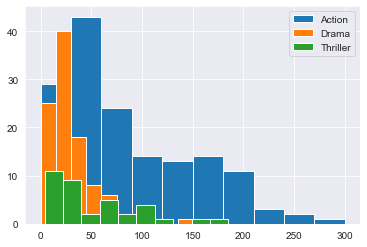

In [71]:
plt.hist(movies[movies.Genre=='Action'].BudgetMillions, label='Action');
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions, label='Drama');
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions, label='Thriller');
plt.legend();

In [72]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

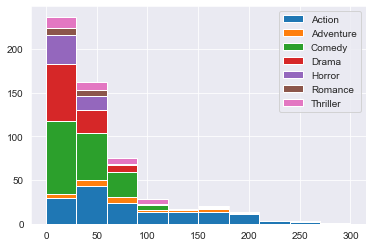

In [73]:
list_genre=[]
mylabels=[]

for gen in movies.Genre.cat.categories:
    list_genre.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)
    
hist1= plt.hist(list_genre, stacked=True, label=mylabels)
plt.legend();

---

In [25]:
#kde plot

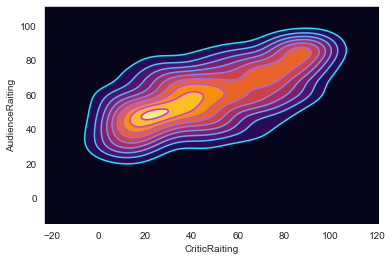

In [74]:
k1= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, shade=True, shade_lowest=True, cmap='inferno')
k1b= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, cmap='cool')

---

In [27]:
#subplot

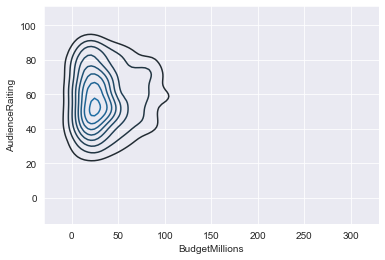

In [75]:
k2= sns.kdeplot(movies.BudgetMillions, movies.AudienceRaiting)

[(-20, 160)]

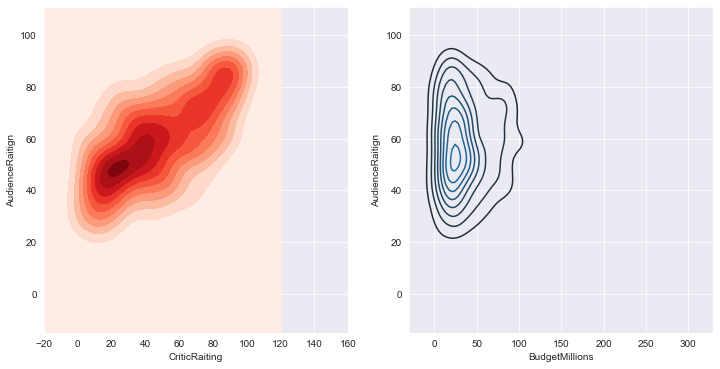

In [38]:
f, axes = plt.subplots(1,2, figsize=(12,6))
k1= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaitign, shade=True, cmap='Reds', ax=axes[0])
k2= sns.kdeplot(movies.BudgetMillions, movies.AudienceRaitign, ax=axes[1])
k1.set(xlim=(-20,160))

---

In [39]:
#violinplot

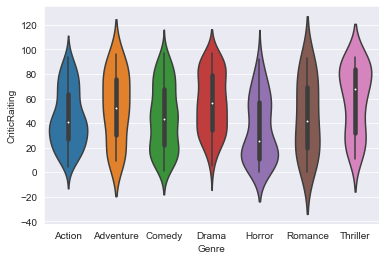

In [41]:

z=sns.violinplot(data=movies, x='Genre', y='CriticRaiting');

---

In [42]:
#facet grid

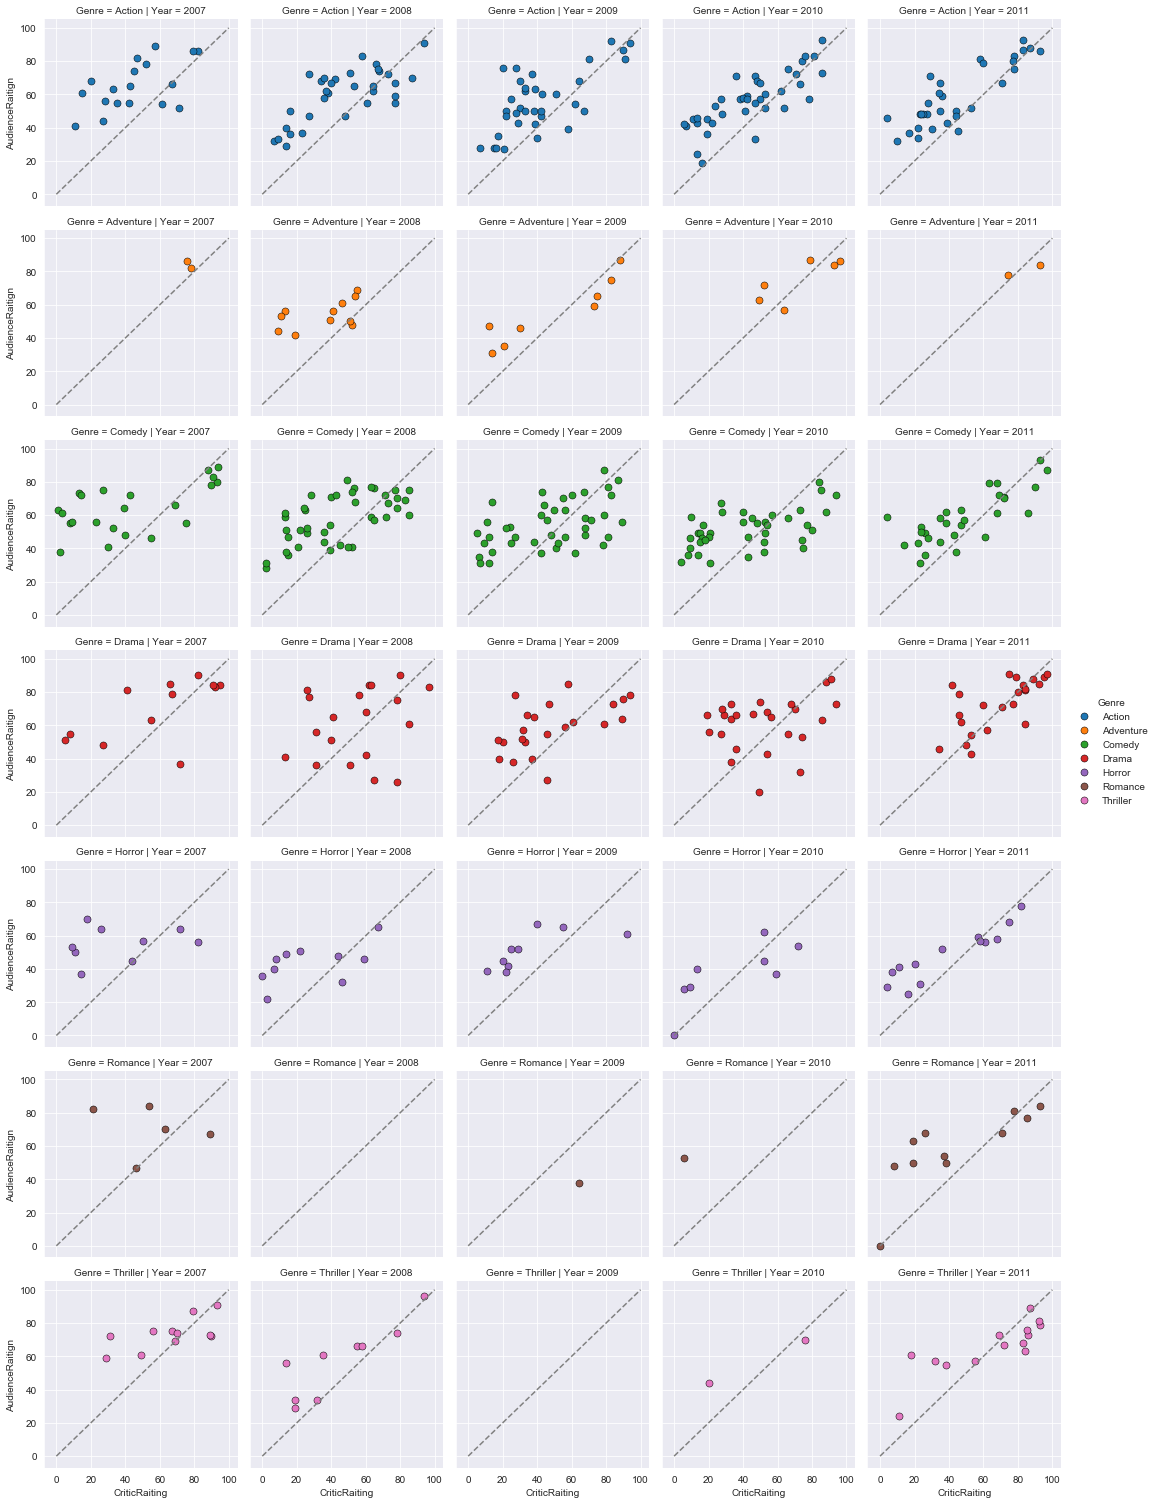

In [53]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
#g.set(xlim=(0, 1000), ylim=(0,1000))
g = g.map(plt.scatter, 'CriticRaiting', 'AudienceRaitign', **kws)
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='grey', ls='--')
g.add_legend();

---

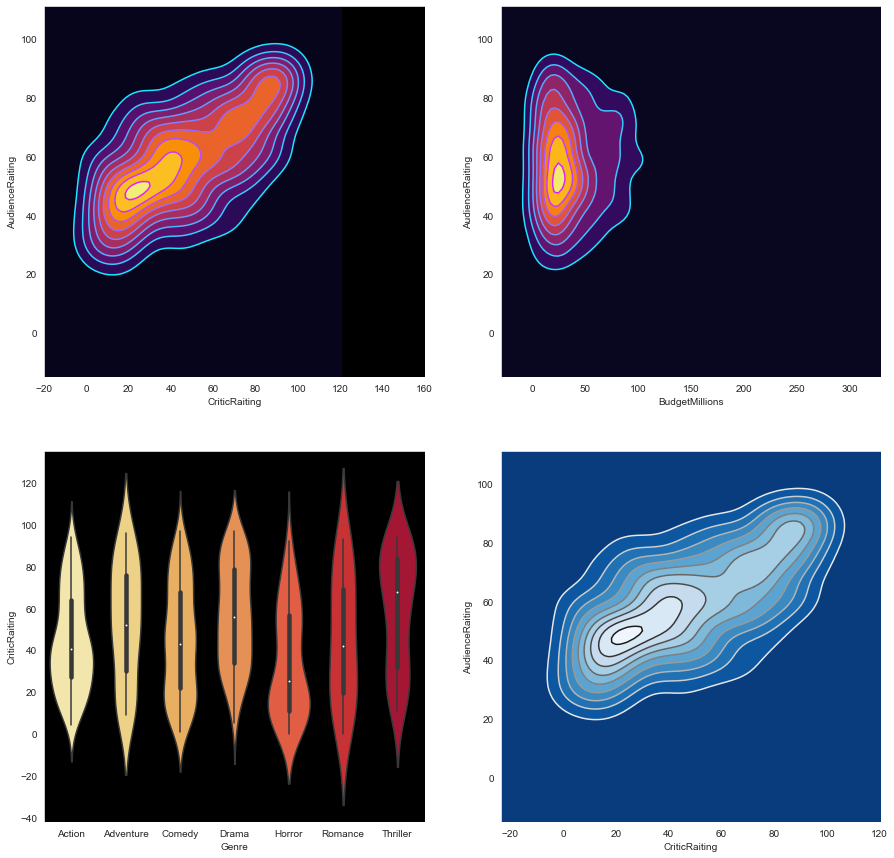

In [79]:
sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots(2,2, figsize=(15,15))
#plot 0,0
k1= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, cmap='cool',ax=axes[0,0]) 

#plot 0,1
k2= sns.kdeplot(movies.BudgetMillions, movies.AudienceRaiting, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b= sns.kdeplot(movies.BudgetMillions, movies.AudienceRaiting, cmap='cool', ax=axes[0,1])
k1.set(xlim=(-20,160))

#plot 1,0 
z=sns.violinplot(data=movies, x='Genre', y='CriticRaiting',palette='YlOrRd', ax=axes[1,0])

#plot 1,1 
k3= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, shade=True, shade_lowest=True, cmap='Blues_r', ax=axes[1,1])
k3b= sns.kdeplot(movies.CriticRaiting, movies.AudienceRaiting, cmap='gist_gray_r', ax=axes[1,1])